配合《常用数据挖掘算法总结及Python实现.pdf》

# KNN算法Python实现实例之电影分类

任务描述：通过打斗次数和接吻次数来界定电影类型

In [1]:
import numpy as np
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier() #取得knn分类器
data = np.array([[3,104],[2,100],[1,81],[101,10],[99,5],[98,2]]) #对应着打斗次数和接吻次数
labels = np.array([1,1,1,2,2,2]) #对应Romance和Action
knn.fit(data,labels) #导入数据进行训练

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [8]:
knn.predict(np.array([[18,90]]))

array([1])

# 决策树

## python实现熵的计算

In [ ]:
def calcShannonEnt(dataSet): 
    numEntries = len(dataSet) 
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0 
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob*log(prob,2) 
    return shannonEnt

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [4]:
import numpy as np
from sklearn import tree
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split

In [16]:
#数据读入
data = []
labels = []
with open("./some datasets/tree.txt") as file:
    for line in file:
        tokens = line.strip().split('\t')
        data.append([float(tk) for tk in tokens[:-1]])
        labels.append(tokens[-1])
x = np.array(data)
labels = np.array(labels)
y = np.zeros(labels.shape)
#标签转化为0，1
y[labels=='fat'] = 1
#拆分训练数据和测试数据
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
#使用信息熵作为划分标准，对决策树进行决策
clf = tree.DecisionTreeClassifier(criterion='entropy')
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [21]:
clf.fit(x_train,y_train)
#把决策树写入文件
with open("./some datasets/tree.dot",'w') as f:
    f = tree.export_graphviz(clf,out_file=f)

In [22]:
#系数反映每个特征的影响力。越大表示该特征在分类中起到的作用越大

In [23]:
print(clf.feature_importances_)

[ 0.42500483  0.57499517]


In [24]:
answer = clf.predict(x_train)
print(x_train)

[[  1.7  80. ]
 [  1.6  40. ]
 [  1.5  60. ]
 [  1.9  80. ]
 [  1.6  60. ]
 [  1.7  60. ]
 [  1.8  60. ]
 [  1.5  50. ]]


In [25]:
print(answer)

[ 1.  0.  1.  1.  1.  0.  1.  0.]


In [26]:
print(y_train)

[ 1.  0.  1.  1.  1.  0.  1.  0.]


In [27]:
print(np.mean(answer==y_train))

1.0


准确率与召回率

准确率：某个类别在测试结果中被正确测试的比率

召回率：某个类别在真实结果中被正确预测的比率

测试结果： array([ 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.])

真实结果： array([ 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.])

分为 thin 的准确率为 0.83。是因为分类器分出了 6 个 thin，其中正确的有 5 个，因此分为 thin 的准确率为5/6=0.83。

分为 thin 的召回率为 1.00。是因为数据集中共有 5 个 thin，而分类器把他们都分对了（虽然把一个 fat 分成了thin！)，
召回率 5/5=1。

分为 fat 的准确率为 1.00。不再赘述。

分为 fat 的召回率为 0.80。是因为数据集中共有 5 个 fat，而分类器只分出了 4 个（把一个 fat 分成了 thin！），召
回率 4/5=0.80。

本例中，目标是尽可能保证找出来的胖子是真胖子（准确率），还是保证尽可能找到更多的胖子（召回率）。

In [29]:
precision,recall,thresholds = precision_recall_curve(y_train,clf.predict(x_train))
answer = clf.predict_proba(x)[:,1]
print(classification_report(y,answer,target_names=['thin','fat']))

             precision    recall  f1-score   support

       thin       1.00      0.75      0.86         4
        fat       0.86      1.00      0.92         6

avg / total       0.91      0.90      0.90        10



## 随机森林

In [ ]:
#import Lib
from sklearn.ensemble import RandomForestClassifier
#use RandomForestRegressor for regression problem
#Assumed you have X(predictor) and Y(target) for training dataset and x_test(predictor) of test_dataset
#Create Random Forest object
model = RandomForestClassifier(n_estimators=1000)
model.fit(X,y)
predicted = model.predict(x_test)

# 朴素贝叶斯分类

In [ ]:
from sklearn.naive_bayes import GaussianNB
#Assumed you have X(predictor) and Y(target) for training dataset and x_test(predictor) of test_dataset
model.fit(X,y)
model.predict(x_test)

# Logistic Regression

案例描述：辨别不同因素对研究生录取的影响
数据集中前三列作为预测变量（predictor variable）
* gpa
* gre
* rank表示本科生母校的声望
第四列admit则是二分类目标变量，它表明考生最终是否被录用

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Kismet\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("./some datasets/lr-binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
df.columns = ['admit','gre','gpa','prestige']
df.columns

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

In [4]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [5]:
df.std()

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64

In [6]:
pd.crosstab(df['admit'],df['prestige'],rownames=['admit'])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002484F6688D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002484FB26AC8>]], dtype=object)

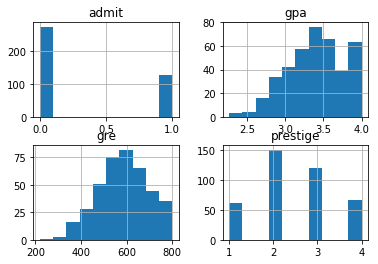

In [7]:
df.hist()

In [8]:
dummy_ranks = pd.get_dummies(df['prestige'],prefix='prestige')
dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [9]:
cols_to_keep = ['admit','gre','gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:,'prestige_2':])
data.head()

C:\Users\Kismet\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [10]:
data['intercept'] = 1.0

将新的虚拟变量加入到了原始的数据集中后，就不再需要原来的 prestige 列了。在此要强调一点，
生成 m 个虚拟变量后，只要引入 m-1 个虚拟变量到数据集中，未引入的一个是作为基准对比的。
最后，还需加上常数 intercept， statemodels 实现的逻辑回归需要显式指定。

本例中要预测的是 admit 列，使用 gre， gpa 和虚拟变量 prestige_2, prestige_3, prestige_4; prestige_1
作为基准，所以要排除掉

In [11]:
train_cols = data.columns[1:]
train_cols

Index(['gre', 'gpa', 'prestige_2', 'prestige_3', 'prestige_4', 'intercept'], dtype='object')

In [12]:
logit = sm.Logit(data['admit'],data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


构建预测集

与训练集相似，一般也是通过 pd.read_csv() 读入

在这边为方便，我们将训练集拷贝一份作为预测集（不包括 admin 列）

In [13]:
import copy
combos = copy.deepcopy(data)
predict_cols = combos.columns[1:]
combos['intercept'] = 1.0
combos['predict'] = result.predict(combos[predict_cols])

预测完成后， predict 的值是介于 [0, 1] 间的概率值

我们可以根据需要，提取预测结果

例如，假定 predict > 0.5，则表示会被录取

在这边我们检验一下上述选取结果的精确度

In [14]:
combos.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept,predict
0,0,380,3.61,0,1,0,1.0,0.172627
1,1,660,3.67,0,1,0,1.0,0.292175
2,1,800,4.00,0,0,0,1.0,0.738408
3,1,640,3.19,0,0,1,1.0,0.178385
4,0,520,2.93,0,0,1,1.0,0.118354


In [15]:
total = 0
hit = 0
for value in combos.values:
    predict = value[-1]
    admit = int(value[0])
    if predict > 0.5:
        total +=1
        if admit==1:
            hit+=1
print('Total:%d, Hit:%d, Precision:%.2f' % (total,hit,100.0*hit/total))

Total:49, Hit:30, Precision:61.22


In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Wed, 24 Jan 2018   Pseudo R-squ.:                 0.08292
Time:                        13:39:30   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
prestige_2    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
prestige_3    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
prestige_4    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
intercept     -3.9900      1.140     -3.500      0.000      -6.224      -1.756
==============================================================================
"""

In [17]:
#每个系数的置信区间
print(result.conf_int())

                   0         1
gre         0.000120  0.004409
gpa         0.153684  1.454391
prestige_2 -1.295751 -0.055135
prestige_3 -2.016992 -0.663416
prestige_4 -2.370399 -0.732529
intercept  -6.224242 -1.755716


In [18]:
np.exp(result.params)

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64

In [19]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns=['2.5%','97.5%','OR']
print(np.exp(conf))

                2.5%     97.5%        OR
gre         1.000120  1.004418  1.002267
gpa         1.166122  4.281877  2.234545
prestige_2  0.273692  0.946358  0.508931
prestige_3  0.133055  0.515089  0.261792
prestige_4  0.093443  0.480692  0.211938
intercept   0.001981  0.172783  0.018500


# SVM支持向量机

SVM 把分类问题转化为寻找分类平面的问题，并通过最大化分类边界点距离分类平面的距离来实现分类

# 集成学习(Ensemble Learning)

集成学习是机器学习中一个非常重要且热门的分支，是用多个弱分类器构成一个强分类器，其哲学思想是“三个臭皮匠赛过诸葛亮”。 一般的弱分类器可以由决策树， 神经网络， 贝叶斯分类器， K-近邻等构成。已经有学者理论上证明了集成学习的思想是可以提高分类器的性能的，比如说统计上的原因，计算上的原因以及表示上的原因

boosting 的弱分类器形成是同一种机器学习算法，只是其数据抽取时的权值在不断更新，每次都是提高前一次分错了的数据集的权值，最后得到 T 个弱分类器，且分类器的权值也跟其中间结果的数
据有关

Bagging 算法也是用的同一种弱分类器，其数据的来源是用 bootstrap 算法得到的（有放回抽样）。

Stacking 算法分为 2 层，第一层是用不同的算法形成 T 个弱分类器，同时产生一个与原数据集大小
相同的新数据集，利用这个新数据集和一个新算法构成第二层的分类器。

## Adaboost 

“关注”被错分的样本， “器重”性能好的弱分类器

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0)
model.fit(X,y)
predicted = model.predict(x_test)

# 模型评估

## ROC曲线

## AUC-度量分类模型好坏的标准

## 准确率和召回率

## 如何避免过拟合

## 交叉验证

In [ ]:
from sklearn import cross_validation
model = RandomForestClassifier(n_estimators=100)
cv = cross_validation.KFold(len(train),n_folds=10,indices=False)
results=[]
for traincv,testcv in cv:
    probas = model.fit(train[traincsv],target[traincv]).predict_proba(train(testcv))
    results.append(Error_function)
print("Results: "+ str(np.array(results).mean()))